#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10A Understanding the gender difference in earnings**

using the cps-earnings dataset

version 0.9.0 2025-08-14

In [ ]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
warnings.filterwarnings("ignore")


In [47]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/cps-earnings/clean/"
data_out = dirname + "da_case_studies/ch10-gender-earnings-understand/"
output = dirname + "da_case_studies/ch10-gender-earnings-understand/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [48]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [49]:
#cps = pd.read_csv(data_in + "morg-2014-emp.csv") 
cps= pd.read_csv("https://osf.io/download/4ay9x/")


In [50]:
cps = cps.query("uhours>=20 & earnwke>0 & age>=24 & age<=64 & grade92>=44")


In [51]:
# CREATE VARIABLES
cps["female"] = (cps.sex == 2).astype(int)
cps["w"] = cps["earnwke"] / cps["uhours"]
cps["lnw"] = np.log(cps["w"])
## Write out to csv
cps.to_csv(data_out + "earnings_multireg.csv")


In [52]:
#####################
# DISTRIBUTION OF EARNINGS
#######################
cps.loc[:, ["earnwke", "uhours", "w"]].describe()


,earnwke,uhours,w
count,18241.00000,18241.000000,18241.000000
mean,1481.78936,42.970780,34.525791
std,747.92426,9.139368,16.654215
min,0.01000,20.000000,0.000200
25%,923.00000,40.000000,21.634500
50%,1346.00000,40.000000,31.250000
75%,1923.07000,47.000000,45.673000
max,2884.61000,99.000000,144.230500


In [53]:
cps.loc[cps.w >= 1, ["earnwke", "uhours", "w"]].describe()


,earnwke,uhours,w
count,18220.000000,18220.000000,18220.000000
mean,1483.491212,42.970088,34.565432
std,746.672256,9.135281,16.622801
min,38.000000,20.000000,1.025556
25%,923.000000,40.000000,21.634500
50%,1346.000000,40.000000,31.250000
75%,1923.070000,47.000000,45.673000
max,2884.610000,99.000000,144.230500


### Table 10.1 Gender differences in earnings – log earnings and gender

In [54]:
reg = pf.feols("lnw~female", data=cps,vcov="HC1")
reg2 = pf.feols("lnw~female+age", data=cps,vcov="HC1")
reg3 = pf.feols("age~female", data=cps,vcov="HC1")

In [55]:
pf.etable([reg,reg2,reg3],
          head_order="h",
          model_heads=["ln wage","lnwage", "age"],
          labels={"Intercept": "Constant"}          
)

GT(_tbl_data=  level_0             level_1                       0                       1  \
0    coef              female  -0.195*** <br> (0.008)  -0.185*** <br> (0.008)   
1    coef                 age                           0.007*** <br> (0.000)   
2    coef            Constant   3.514*** <br> (0.006)   3.198*** <br> (0.018)   
3   stats        Observations                   18241                   18241   
4   stats           S.E. type                  hetero                  hetero   
5   stats       R<sup>2</sup>                   0.028                   0.046   
6   stats  Adj. R<sup>2</sup>                   0.028                   0.045   

                        2  
0  -1.484*** <br> (0.159)  
1                          
2  44.630*** <br> (0.116)  
3                   18241  
4                  hetero  
5                   0.005  
6                   0.005  , _body=<great_tables._gt_data.Body object at 0x00000230E06AE6C0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230E06AFD40>, _spanners=Spanners([SpannerInfo(spanner_id='ln wage', spanner_level=1, spanner_label='ln wage', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='lnwage', spanner_level=1, spanner_label='lnwage', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='age', spanner_level=1, spanner_label='age', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230E06AEFC0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_

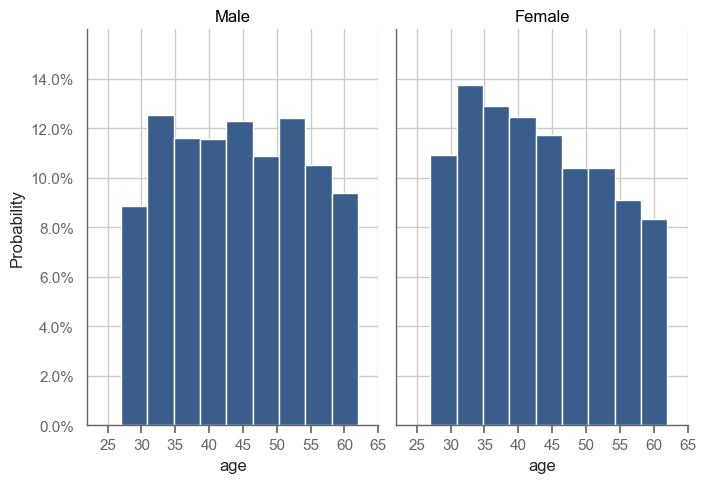

In [56]:
cps['female2'] = cps['female'].apply(lambda x: 'Male' if x == 0 else 'Female')
g = sns.FacetGrid(cps, col="female2",height=5, aspect=0.7,col_order=["Male","Female"])
g.map_dataframe(sns.histplot, x="age",
                binwidth=4,  
                binrange=(27,62),
                #color=da.color[0],
                edgecolor="white",
                stat="probability",  
                alpha=1)
g.set_titles(col_template="{col_name}")
#g.figure(figsize = (10,8))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0, 0.16)
plt.yticks(ticks=np.arange(0, 0.15, 0.02))
plt.xlim(22,65)
plt.xticks(ticks=np.arange(25, 66, 5))
plt.show()

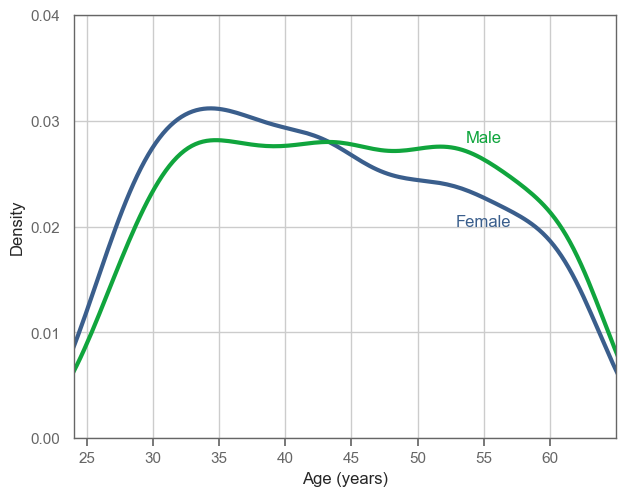

In [57]:
sns.kdeplot(
    data=cps,
    x="age",
    hue="female",
    bw_adjust=1.5,
    common_norm=False,
    linewidth=3,
    palette={0: da.color[1], 1: da.color[0]},
    legend=False,
)
plt.xlim(24, 65)
plt.xticks(ticks=np.arange(25, 61, 5))
plt.yticks(ticks=np.arange(0, 0.041, 0.01))
plt.annotate(
    "Male", xy=(55, 0.028), xytext=(55, 0.028), fontsize=12, color=da.color[1], ha="center"
)
plt.annotate(
    "Female", xy=(55, 0.02), xytext=(55, 0.02), fontsize=12, color=da.color[0], ha="center"
)
plt.xlabel("Age (years)")
plt.show()

### Table 10.2 Gender differences in earnings – log earnings and age, various functional forms

In [58]:
cps["agesq"] = np.power(cps["age"], 2)
cps["agecu"] = np.power(cps["age"], 3)
cps["agequ"] = np.power(cps["age"], 4)


In [59]:
reg4 = pf.feols("lnw~female", data=cps,vcov="HC1")
reg5 = pf.feols("lnw~female+age", data=cps,vcov="HC1")
reg6 = pf.feols("lnw~female+age+agesq", data=cps,vcov="HC1")
reg7 = pf.feols("lnw~female+age+agesq+agecu+agequ", data=cps,vcov="HC1")

In [60]:
pf.etable([reg4,reg5,reg6,reg7],
          labels={"Intercept": "Constant"}          
)

GT(_tbl_data=  level_0             level_1                       0                       1  \
0    coef              female  -0.195*** <br> (0.008)  -0.185*** <br> (0.008)   
1    coef                 age                           0.007*** <br> (0.000)   
2    coef               agesq                                                   
3    coef               agecu                                                   
4    coef               agequ                                                   
5    coef            Constant   3.514*** <br> (0.006)   3.198*** <br> (0.018)   
6   stats        Observations                   18241                   18241   
7   stats           S.E. type                  hetero                  hetero   
8   stats       R<sup>2</sup>                   0.028                   0.046   
9   stats  Adj. R<sup>2</sup>                   0.028                   0.045   

                        2                       3  
0  -0.183*** <br> (0.008)  -0.183*** <br> (0.008)  
1   0.063*** <br> (0.003)   0.572*** <br> (0.116)  
2  -0.001*** <br> (0.000)  -0.017*** <br> (0.004)  
3                           0.000*** <br> (0.000)  
4                           -0.000** <br> (0.000)  
5   2.027*** <br> (0.073)   -3.606** <br> (1.178)  
6                   18241                   18241  
7                  hetero                  hetero  
8                   0.060                   0.062  
9                   0.059                   0.062  , _body=<great_tables._gt_data.Body object at 0x00000230D446CE30>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230E06D1FD0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230E06AA0C0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=

### Table 10.3 Gender differences in earnings – log earnings, gender and education

In [61]:
cps["ed_MA"] = (cps["grade92"] == 44).astype(int)
cps["ed_Profess"] = (cps["grade92"] == 45).astype(int)
cps["ed_Phd"] = (cps["grade92"] == 46).astype(int)


In [62]:
reg8 = pf.feols("lnw~female", data=cps,vcov="HC1")
reg9 = pf.feols("lnw~female + ed_Profess + ed_Phd", data=cps,vcov="HC1")
reg10 = pf.feols("lnw~female + ed_Profess + ed_MA", data=cps,vcov="HC1")

In [63]:
pf.etable([reg8,reg9,reg10],
          labels={"Intercept": "Constant"}          
)

GT(_tbl_data=  level_0             level_1                       0                       1  \
0    coef              female  -0.195*** <br> (0.008)  -0.182*** <br> (0.009)   
1    coef          ed_Profess                           0.134*** <br> (0.015)   
2    coef              ed_Phd                           0.136*** <br> (0.013)   
3    coef               ed_MA                                                   
4    coef            Constant   3.514*** <br> (0.006)   3.473*** <br> (0.007)   
5   stats        Observations                   18241                   18241   
6   stats           S.E. type                  hetero                  hetero   
7   stats       R<sup>2</sup>                   0.028                   0.038   
8   stats  Adj. R<sup>2</sup>                   0.028                   0.038   

                        2  
0  -0.182*** <br> (0.009)  
1     -0.002 <br> (0.018)  
2                          
3  -0.136*** <br> (0.013)  
4   3.609*** <br> (0.013)  
5                   18241  
6                  hetero  
7                   0.038  
8                   0.038  , _body=<great_tables._gt_data.Body object at 0x00000230D4492840>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230E06D5520>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230D5BCB3B0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table'

### Table 10.4 Gender differences in earnings – log earnings, gender, age, and their interaction

In [64]:
reg11 = pf.feols("lnw~age", data=cps.query("female==1"),vcov="HC1")
reg12 = pf.feols("lnw~age", data=cps.query("female==0"),vcov="HC1")
reg13 = pf.feols("lnw~female+age+age*female", data=cps,vcov="HC1")

In [65]:
pf.etable([reg11,reg12,reg13],
          labels={"Intercept": "Constant"}          
)

GT(_tbl_data=  level_0             level_1                      0                      1  \
0    coef                 age  0.006*** <br> (0.001)  0.009*** <br> (0.001)   
1    coef              female                                                 
2    coef   age &#215; female                                                 
3    coef            Constant  3.081*** <br> (0.023)  3.117*** <br> (0.026)   
4   stats        Observations                   9685                   8556   
5   stats           S.E. type                 hetero                 hetero   
6   stats       R<sup>2</sup>                  0.011                  0.028   
7   stats  Adj. R<sup>2</sup>                  0.011                  0.028   

                        2  
0   0.009*** <br> (0.001)  
1     -0.036 <br> (0.035)  
2  -0.003*** <br> (0.001)  
3   3.117*** <br> (0.026)  
4                   18241  
5                  hetero  
6                   0.047  
7                   0.046  , _body=<great_tables._gt_data.Body object at 0x00000230E06D42C0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230E06CCF80>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230D5AA7530>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), tabl

### Figure 10.2 Earning differences by gender as function of age
FOR RPEDICTIONL FUNCTIONAL FORMS & INTERACTIONS WITH GENDER

In [66]:
reg14 = pf.feols("lnw~age+agesq+agecu+agequ", data=cps.query("female==1"),vcov="HC1")
reg15 = pf.feols("lnw~age+agesq+agecu+agequ", data=cps.query("female==0"),vcov="HC1")
reg16 = pf.feols("lnw ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",
    data=cps,vcov="HC1")

In [67]:
pf.etable([reg14,reg15,reg16],
          labels={"Intercept": "Constant"}          
)

GT(_tbl_data=   level_0              level_1                       0                    1  \
0     coef                  age   0.738*** <br> (0.160)  0.391* <br> (0.167)   
1     coef                agesq  -0.023*** <br> (0.006)  -0.011 <br> (0.006)   
2     coef                agecu   0.000*** <br> (0.000)   0.000 <br> (0.000)   
3     coef                agequ   -0.000** <br> (0.000)  -0.000 <br> (0.000)   
4     coef               female                                                
5     coef    female &#215; age                                                
6     coef  female &#215; agesq                                                
7     coef  female &#215; agecu                                                
8     coef  female &#215; agequ                                                
9     coef             Constant  -5.453*** <br> (1.622)  -1.857 <br> (1.707)   
10   stats         Observations                    9685                 8556   
11   stats            S.E. type                  hetero               hetero   
12   stats        R<sup>2</sup>                   0.027                0.050   
13   stats   Adj. R<sup>2</sup>                   0.026                0.050   

                      2  
0   0.391* <br> (0.167)  
1   -0.011 <br> (0.006)  
2    0.000 <br> (0.000)  
3   -0.000 <br> (0.000)  
4   -3.596 <br> (2.355)  
5    0.347 <br> (0.231)  
6   -0.012 <br> (0.008)  
7    0.000 <br> (0.000)  
8   -0.000 <br> (0.000)  
9   -1.857 <br> (1.707)  
10                18241  
11               hetero  
12                0.065  
13                0.064  , _body=<great_tables._gt_data.Body object at 0x00000230D5BE2AE0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230D5AEF110>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230D5AA6780>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInf

In [68]:
data_m = cps.query("female==0")
pred = reg13.predict(data_m,interval="prediction")[["fit","se_fit"]]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 1.95 * data_m["se_fit"]
data_m["CIlo"] = data_m["fit"] - 1.95 * data_m["se_fit"]


data_f = cps.query("female==1")
pred = reg13.predict(data_f,interval="prediction")[["fit","se_fit"]]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 1.95 * data_f["se_fit"]
data_f["CIlo"] = data_f["fit"] - 1.95 * data_f["se_fit"]

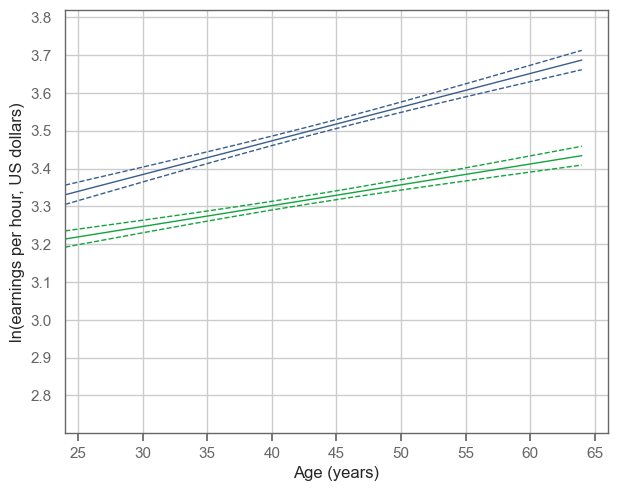

In [69]:
sns.lineplot(data=data_m,x="age",y="fit",linewidth=1,estimator=None,ci=False)
sns.lineplot(data=data_m,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = da.color[0],linestyle = "dashed")
sns.lineplot(data=data_m,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = da.color[0],linestyle = "dashed")

sns.lineplot(data=data_f,x="age",y="fit",linewidth=1,estimator=None,ci=False,color = da.color[1])
sns.lineplot(data=data_f,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = da.color[1],linestyle = "dashed")
sns.lineplot(data=data_f,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = da.color[1],linestyle = "dashed")


plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour, US dollars)", fontsize=12)
plt.xlim(24,66)
plt.xticks(ticks=np.arange(25, 66, 5))
plt.ylim(2.7,3.82)
plt.yticks(ticks=np.arange(2.8, 3.9, 0.1))

plt.show()

In [70]:
data_m = cps.query("female==0")
pred = reg16.predict(data_m,interval="prediction")[["fit","se_fit"]]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 1.95 * data_m["se_fit"]
data_m["CIlo"] = data_m["fit"] - 1.95 * data_m["se_fit"]


data_f = cps.query("female==1")
pred = reg16.predict(data_f,interval="prediction")[["fit","se_fit"]]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 1.95 * data_f["se_fit"]
data_f["CIlo"] = data_f["fit"] - 1.95 * data_f["se_fit"]

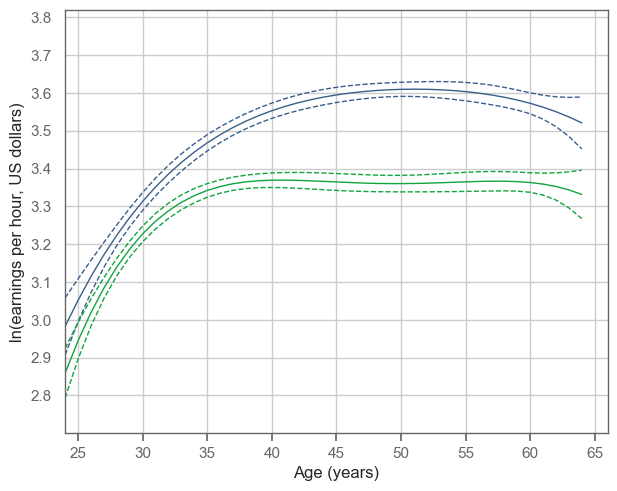

In [71]:
sns.lineplot(data=data_m,x="age",y="fit",linewidth=1,estimator=None,ci=False)
sns.lineplot(data=data_m,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = da.color[0],linestyle = "dashed")
sns.lineplot(data=data_m,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = da.color[0],linestyle = "dashed")

sns.lineplot(data=data_f,x="age",y="fit",linewidth=1,estimator=None,ci=False,color = da.color[1])
sns.lineplot(data=data_f,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = da.color[1],linestyle = "dashed")
sns.lineplot(data=data_f,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = da.color[1],linestyle = "dashed")


plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour, US dollars)", fontsize=12)
plt.xlim(24,66)
plt.xticks(ticks=np.arange(25, 66, 5))
plt.ylim(2.7,3.82)
plt.yticks(ticks=np.arange(2.8, 3.9, 0.1))

plt.show()

## Part 2
TOWARDS CAUSAL ANALYIS - IS IT DISCRIMINATION?

In [72]:
# FILTER DATA -  SELECTION of the sample we need
cps = cps.query("age>=40 & age<=60")


In [73]:
cps["white"] = (cps["race"] == 1).astype(int)
cps["afram"] = (cps["race"] == 2).astype(int)
cps["asian"] = (cps["race"] == 4).astype(int)
cps["hisp"] = (cps["ethnic"].notna()).astype(int)
cps["othernonw"] = (
    (cps["white"] == 0) & (cps["afram"] == 0) & (cps["asian"] == 0) & (cps["hisp"] == 0)
).astype(int)
cps["nonUSborn"] = (
    (cps["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (cps["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)


In [74]:
# Potentially endogeneous demographics
cps["married"] = ((cps["marital"] == 1) | (cps["marital"] == 2)).astype(int)
cps["divorced"] = ((cps["marital"] == 3) & (cps["marital"] == 5)).astype(int)
cps["wirowed"] = (cps["marital"] == 4).astype(int)
cps["nevermar"] = (cps["marital"] == 7).astype(int)

cps["child0"] = (cps["chldpres"] == 0).astype(int)
cps["child1"] = (cps["chldpres"] == 1).astype(int)
cps["child2"] = (cps["chldpres"] == 2).astype(int)
cps["child3"] = (cps["chldpres"] == 3).astype(int)
cps["child4pl"] = (cps["chldpres"] >= 4).astype(int)

# Work-related variables
cps["fedgov"] = (cps["class"] == "Government - Federal").astype(int)
cps["stagov"] = (cps["class"] == "Government - State").astype(int)
cps["locgov"] = (cps["class"] == "Government - Local").astype(int)
cps["nonprof"] = (cps["class"] == "Private, Nonprofit").astype(int)
cps["ind2dig"] = ((pd.Categorical(cps["ind02"]).codes + 1) / 100).astype(int)
cps["occ2dig"] = (cps["occ2012"] / 100).astype(int)
cps["union"] = ((cps["unionmme"] == "Yes") | (cps["unioncov"] == "Yes")).astype(int)


In [75]:
cps["uhourssq"] = np.power(cps["uhours"], 2)
cps["uhourscu"] = np.power(cps["uhours"], 3)
cps["uhoursqu"] = np.power(cps["uhours"], 4)


### Table 10.5 Gender differences in earnings – regression with many covariates on a narrower sample

In [76]:
reg1 = pf.feols("lnw ~ female", data=cps,vcov="HC1")
reg2 = pf.feols("lnw ~ female + age + ed_Profess + ed_Phd", data=cps,vcov="HC1")
reg3 = pf.feols("lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig)",
    data=cps,vcov="HC1"
)
reg4 = pf.feols("lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig) + agesq + agecu + agequ + uhoursqu + uhourscu + uhourssq",
    data=cps,vcov="HC1"
)

In [77]:
pf.etable([reg1,reg2,reg3,reg4],
          keep=["female","Intercept"],
          labels={"Intercept": "Constant"}   
)

GT(_tbl_data=  level_0             level_1                       0                       1  \
0    coef              female  -0.224*** <br> (0.012)  -0.212*** <br> (0.012)   
1    coef            Constant   3.590*** <br> (0.008)   3.542*** <br> (0.049)   
2   stats        Observations                    9816                    9816   
3   stats           S.E. type                  hetero                  hetero   
4   stats       R<sup>2</sup>                   0.036                   0.043   
5   stats  Adj. R<sup>2</sup>                   0.035                   0.043   

                        2                       3  
0  -0.150*** <br> (0.012)  -0.140*** <br> (0.012)  
1   3.852*** <br> (0.079)   -56.715 <br> (37.108)  
2                    9816                    9816  
3                  hetero                  hetero  
4                   0.182                   0.195  
5                   0.168                   0.181  , _body=<great_tables._gt_data.Body object at 0x00000230E06C5040>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230D5BC13A0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230D5BC8860>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border